In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(rc={'figure.figsize':(18,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
import datetime
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")
df.columns

Index(['date', 'hour', 'day_ahead_price', 'intraday_price', 'price_diff',
       'solar_capacity', 'solar_generation_actual', 'wind_capacity',
       'wind_generation_actual', 'wind_generation_forecast',
       'solar_generation_forecast', 'total_generation_forecast',
       'total_generation_actual', 'wind_forecast_error',
       'solar_forecast_error', 'forecast_error', 'wind_forecast_error_percent',
       'solar_forecast_error_percent', 'pricediff_percent',
       'mov_avg_30_forecast_error', 'mov_avg_30_wind_forecast_error',
       'mov_avg_30_solar_forecast_error', 'mov_avg_10_forecast_error',
       'mov_avg_10_wind_forecast_error', 'mov_avg_10_solar_forecast_error',
       'mov_avg_1_forecast_error', 'mov_avg_1_wind_forecast_error',
       'mov_avg_1_solar_forecast_error', 'mov_avg_1_day_ahead',
       'mov_avg_1_intraday', 'season', 'month', 'weekday'],
      dtype='object')

In [2]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [3]:
cRange = ['#475468', '#e7e6e6', '#4b73be', '#df8244', '#a5a5a5', '#f7c143',
          '#20406a', '#deeef8', '#2d6fc0', '#409cd4', '#5ccdd7', '#5ecb9e',
          '#a53218', '#c59933', '#f08a40', '#aa4f30', '#f7bf5d', '#d85733',
          '#728083', '#8babb4', '#7196ad', '#607397', '#8585c2', '#a687c1']
colors = ['#475468', '#e7e6e6', '#4b73be', 
          '#df8244', '#a5a5a5', '#f7c143'] 
cmapOffice = mpl.colors.ListedColormap([cRange[i] for i in range(0, 5)])
cmapBlue = mpl.colors.ListedColormap([cRange[i] for i in range(6, 11)])
cmapRed = mpl.colors.ListedColormap([cRange[i] for i in range(12, 17)])
cmapViolett = mpl.colors.ListedColormap([cRange[i] for i in range(18, 23)])

## What is the relation between renewable electricity generation and the overall price level in the day-ahead and intraday auction?

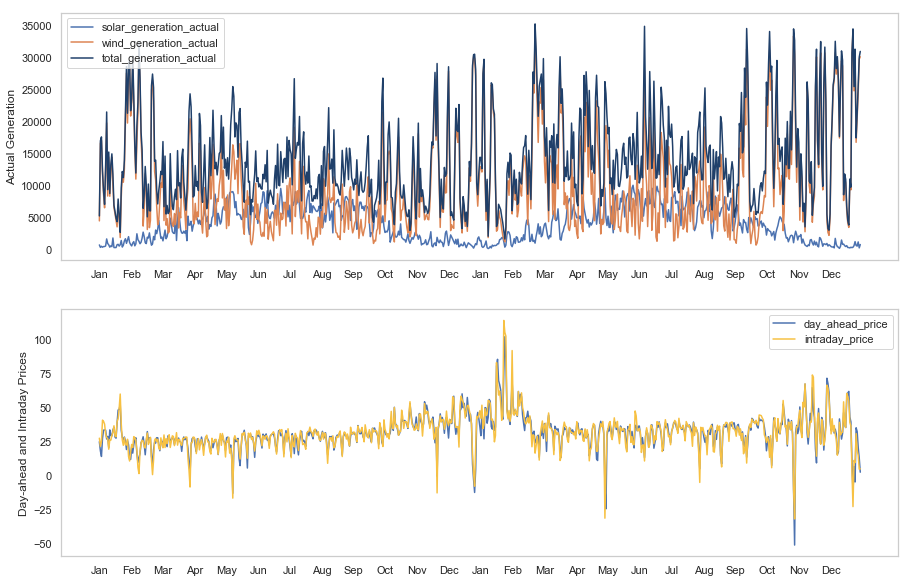

In [4]:
nrow = 2; ncol = 1;

yvalues = [["solar_generation_actual", "wind_generation_actual", "total_generation_actual"],
           ["day_ahead_price", "intraday_price"]]
ylabels = ["Actual Generation", "Day-ahead and Intraday Prices"]

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 10))

for ax in axs.reshape(-1):
    for y in yvalues[ax.rowNum]:
        sns.lineplot(x="date", y=y, data=df, ax=ax, label=y, ci=None)
        ax.legend()
        ax.set_xlabel("")
        ax.set_ylabel(ylabels[ax.rowNum])
        ax.set_xticks(np.arange(720, step=30.5))
        ax.set_xticklabels(2*[month for month in months])
    for child in ax.findobj(Line2D):
        if child.get_label() == y:
            child.set_color(cRange[yvalues[ax.rowNum].index(y) + 4]);

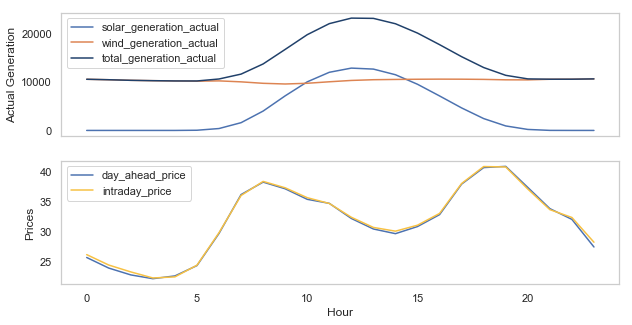

In [5]:
nrow = 2; ncol = 1; ylim = [3, 2]

yvalues = [["solar_generation_actual", "wind_generation_actual", "total_generation_actual"], 
           ["day_ahead_price", "intraday_price"]]
ylabels = ["Actual Generation", "Prices"]

plot_df = df.groupby(["hour"])[[x for yvalues in yvalues for x in yvalues]].mean()

fig, axs = plt.subplots(nrow, ncol, sharex=True, figsize=(10, 5))

for ax in axs.reshape(-1):
    for y in yvalues[ax.rowNum]:
        sns.lineplot(x=plot_df.index, y=y, data=plot_df, ax=ax, label=y)
        ax.legend()
        ax.set_ylabel(ylabels[ax.rowNum])
        ax.set_xlabel("Hour")
    for child in ax.findobj(Line2D):
        if child.get_label() == y:
            child.set_color(cRange[yvalues[ax.rowNum].index(y) + 4]);

<img src="../Solarenergie.png">

## How to characterize the distribution of forecast errors? How did forecast errors develop over time?

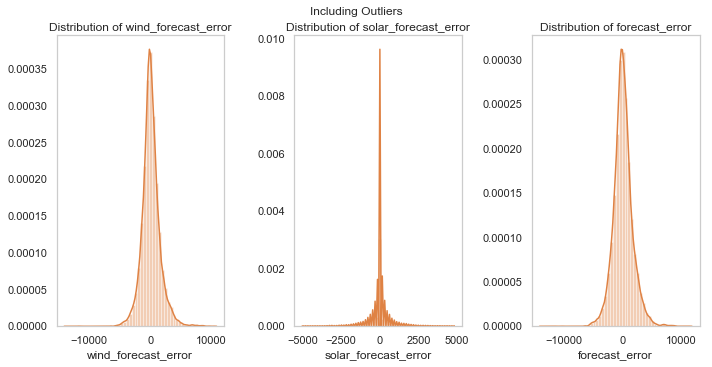

In [6]:
nrow = 1; ncol = 3; xattr = ["wind_forecast_error", "solar_forecast_error", "forecast_error"]

fig, axs = plt.subplots(nrow, ncol, figsize=(10, 5))

for ax in axs.reshape(-1):
        sns.distplot(df[xattr[ax.colNum]], ax=ax, color=cRange[3]).set_title("Distribution of " + xattr[ax.colNum])

plt.suptitle("Including Outliers", y=1.01)
plt.tight_layout();

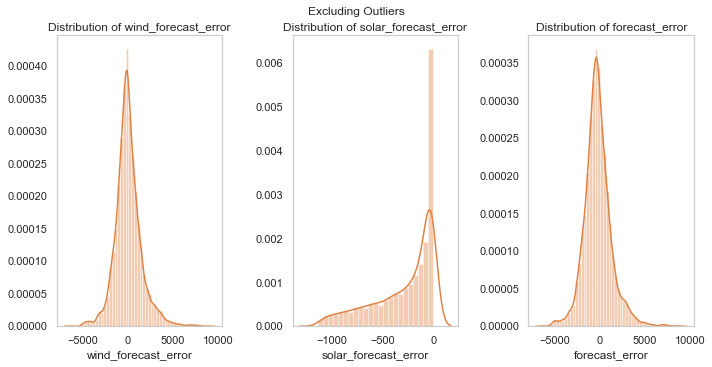

In [7]:
p = df["solar_forecast_error"].quantile(0.75)
q = df["solar_forecast_error"].quantile(0.05)
no_solar_outliers = df[(df["solar_forecast_error"] > q) & (df["solar_forecast_error"] < p)]

fig, axs = plt.subplots(nrow, ncol, figsize=(10, 5))

for ax in axs.reshape(-1):
    sns.distplot(no_solar_outliers[xattr[ax.colNum]], ax=ax, color=cRange[3]).set_title("Distribution of " + xattr[ax.colNum])

plt.suptitle("Excluding Outliers", y=1.01)
plt.tight_layout();

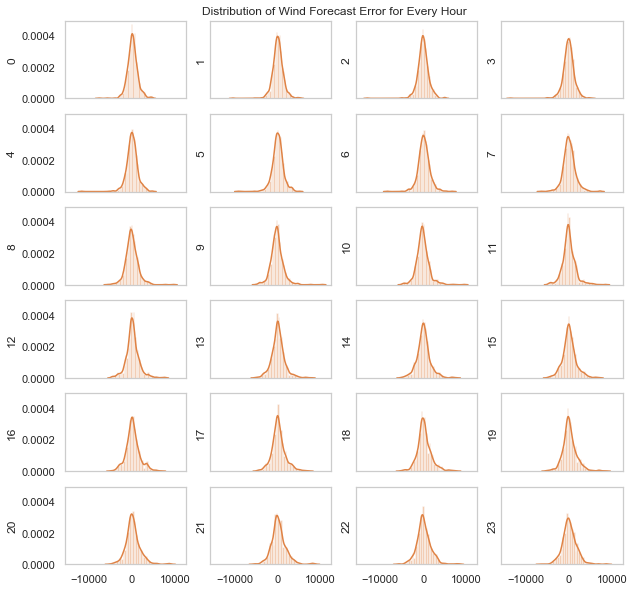

In [8]:
fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = df.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["wind_forecast_error"], ax=ax, axlabel=False, color=cRange[3])
    
plt.suptitle("Distribution of Wind Forecast Error for Every Hour", y=0.9);

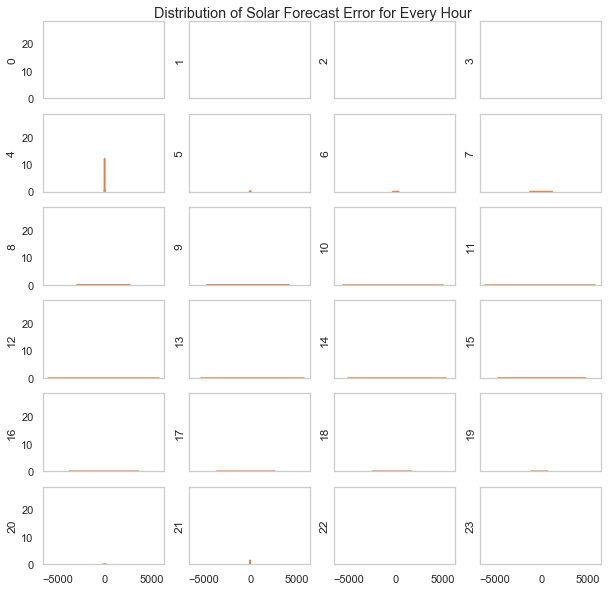

In [126]:
fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = df.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"], ax=ax, axlabel=False, color=cRange[3])
    
plt.suptitle("Distribution of Solar Forecast Error for Every Hour", y=0.9);

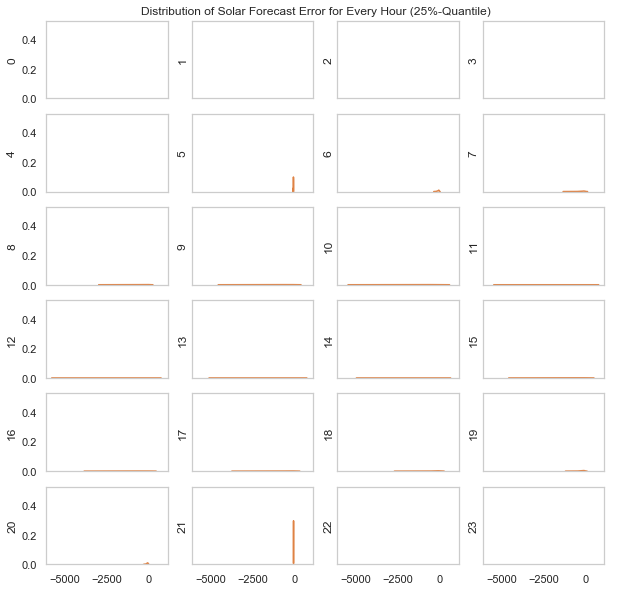

In [10]:
p = df["solar_forecast_error"].quantile(0.25)
q = df["solar_forecast_error"].quantile(0.00)
no_solar_outliers = df[(df["solar_forecast_error"] > q) & (df["solar_forecast_error"] < p)]

fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = no_solar_outliers.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"], ax=ax, axlabel=False, color=cRange[3])
    
plt.suptitle("Distribution of Solar Forecast Error for Every Hour (25%-Quantile)", y=0.9);

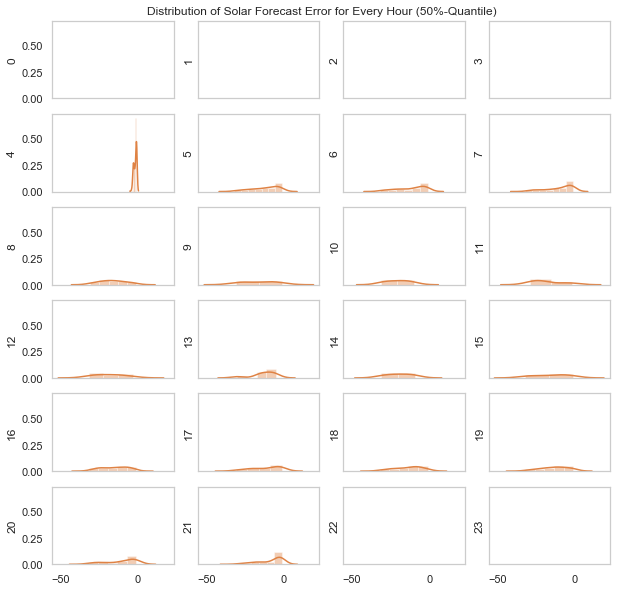

In [12]:
p = df["solar_forecast_error"].quantile(0.50)
q = df["solar_forecast_error"].quantile(0.26)
no_solar_outliers = df[(df["solar_forecast_error"] > q) & (df["solar_forecast_error"] < p)]

fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = no_solar_outliers.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"], ax=ax, axlabel=False, color=cRange[3])
    
plt.suptitle("Distribution of Solar Forecast Error for Every Hour (50%-Quantile)", y=0.9);

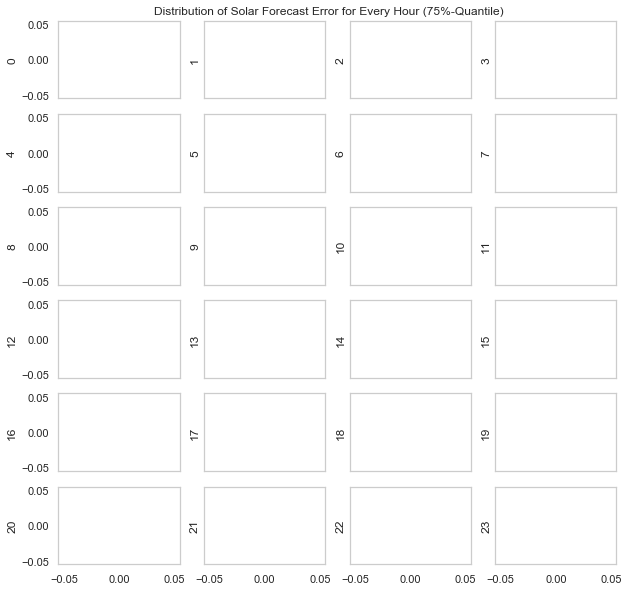

In [13]:
p = df["solar_forecast_error"].quantile(0.75)
q = df["solar_forecast_error"].quantile(0.51)
no_solar_outliers = df[(df["solar_forecast_error"] > q) & (df["solar_forecast_error"] < p)]

fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = no_solar_outliers.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"], ax=ax, axlabel=False, color=cRange[3])
    
plt.suptitle("Distribution of Solar Forecast Error for Every Hour (75%-Quantile)", y=0.9);

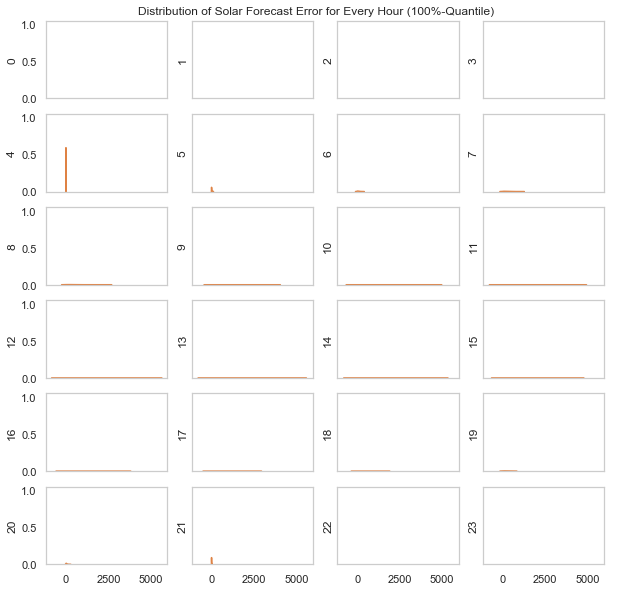

In [14]:
p = df["solar_forecast_error"].quantile(1)
q = df["solar_forecast_error"].quantile(0.76)
no_solar_outliers = df[(df["solar_forecast_error"] > q) & (df["solar_forecast_error"] < p)]

fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = no_solar_outliers.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"], ax=ax, axlabel=False, color=cRange[3])
    
plt.suptitle("Distribution of Solar Forecast Error for Every Hour (100%-Quantile)", y=0.9);

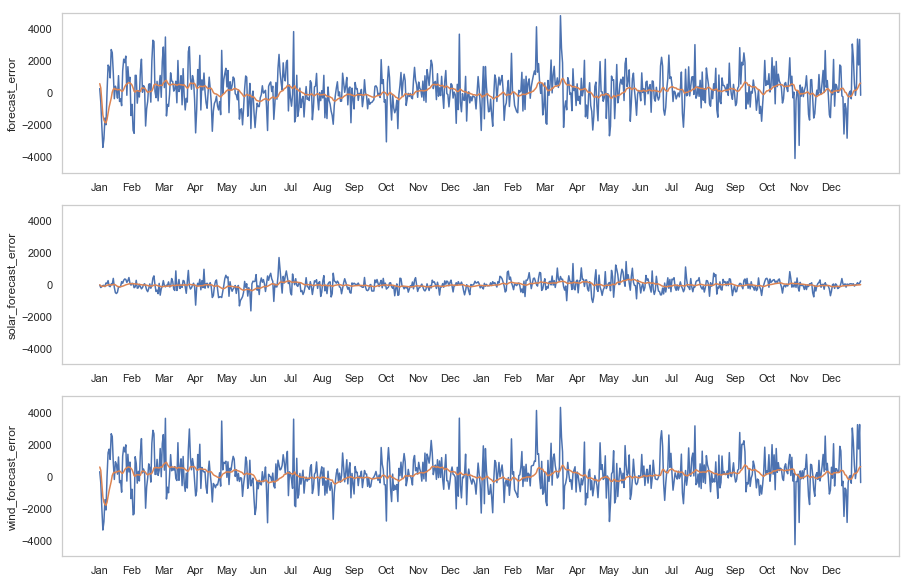

In [131]:
nrow = 3; ncol = 1;

yvalues = [["forecast_error", "mov_avg_30_forecast_error"],
           ["solar_forecast_error", "mov_avg_30_solar_forecast_error"],
           ["wind_forecast_error", "mov_avg_30_wind_forecast_error"]]

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 10))

for ax in axs.reshape(-1):
    for y in yvalues[ax.rowNum]:
        sns.lineplot(x="date", y=y, data=df, ax=ax, ci=None)
        ax.set_ylim(-5000, 5000)
        ax.set_xlabel("")
        ax.set_ylabel(yvalues[ax.rowNum][0])
        ax.set_xticks(np.arange(720, step=30.5))
        ax.set_xticklabels(2*[month for month in months])
    for child in ax.findobj(Line2D):
        if child.get_label() == y:
            child.set_color(cRange[yvalues[ax.rowNum].index(y) + 4]);

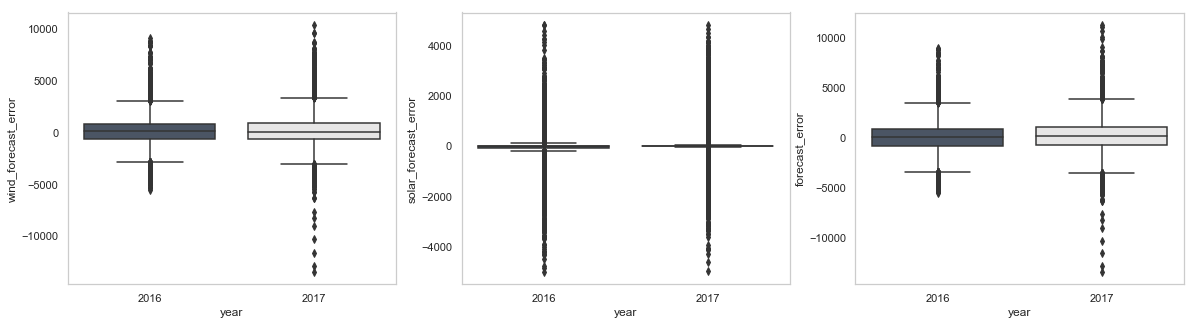

In [26]:
df["date"] = df["date"].astype(str)
df["year"] = df["date"].str.slice(0, 4, 1)

nrow = 1; ncol = 3;

yvalues = ["wind_forecast_error", "solar_forecast_error", "forecast_error"]

fig, axs = plt.subplots(nrow, ncol, figsize=(20, 5))

for ax in axs.reshape(-1):
    sns.boxplot(x="year", y=yvalues[ax.colNum], data=df, ax=ax, palette=cRange);